# Machine Learning Notebook für das IT Sommerfest 2023

In diesem Jupyter Notebook werden alle Grundlagen wiederholt und anhand von Tensorflow demonstriert.

## Schritt 1: Aufsetzen der Umgebung für das maschinelle Lernmodell

### Schritt 1.1: Wichtige Bibliotheken importieren, Umgebung vorbereiten

Hier werden alle Bibliotheken kurz beschrieben. Numpy ist eine Python-Bibliothek, die Operationen mit Matrizen und Arrays unterstützt, mehr dazu unter https://www.w3schools.com/python/numpy/numpy_intro.asp. Mit den Funktionen der Matplotlib können Grafiken und Funktionsdarstellungen erstellt werden https://www.w3schools.com/python/matplotlib_intro.asp. Das Modul os ermöglicht den Aufruf von Systemfunktionen aus Python heraus, mehr dazu hier https://docs.python.org/3/library/os.html. Mit der time Bibliothek kann man z.B. die Ausführungszeit eines Programms messen https://docs.python.org/3/library/time.html.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import time

### Schritt 1.2: Importieren der TensorFlow-Bibliothek

TensorFlow ist ein Framework zur Erstellung maschineller Lernmodelle. Mit TensorFlow können neuronale Netze einfach definiert und trainiert werden.

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

## Schritt 2: Vorbereitung der Daten

In diesem Schritt werden geeignete Daten für das Lernen gesucht, bereitgestellt und in die Umgebung geladen.

### Schritt 2.1: Finden eines geeigneten Datensatzes

Um aus den Daten Muster zu erkennen oder zu lernen, kann es notwendig sein, die Struktur oder Form der Daten zu verändern, um sie besser weiterverarbeiten zu können. Als Grundlage dient der Datensatz Katze, Hund und Panda von Kaggle: https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda. 

Unter https://www.kaggle.com/ gibt es viele weitere Datensätze zum Ausprobieren und Verstehen von Machine Learning Ansätzen.

Die Daten des cat-dog-panda Datensatzes wurden heruntergeladen und auf der Festplatte C: gespeichert.

### Schritt 2.2: Setzen der Pfadvariablen, in der die Bilddaten liegen

Mit der Definition dieser Variablen weiß das System, wo sich die Daten befinden und kann auf sie zugreifen.

In [3]:
dir_ = os.path.join('Cat Dog Panda/')

### Schritt 2.3: Aufteilung des Datensatzes in einen Trainings- und einen Testteil.

Hier wird die Skalierung und Aufteilung des Datensatzes festgelegt und ein Objekt erzeugt, mit dem später weitergearbeitet wird. Mit der Skalierung werden die Bilder etwas verkleinert, damit der Computer sie besser verarbeiten kann. Mit dem Parameter "validation_split" kann das Verhältnis von Trainingsdaten zu Testdaten festgelegt werden, d.h. 0.8 also 80% aller Bilder werden zum Üben (Trainieren) der KI verwendet. Die restlichen 0.2, also 20%, werden für den Trainingsdatensatz verwendet, um die Leistungsfähigkeit (Genauigkeit) der KI (des Vorhersagemodells) zu überprüfen.

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255, # Skallierungsfaktor
                                  validation_split = 0.2) # prozentualer Wert wie viele Daten, Testdaten sind

### Schritt 2.4: Vorbereitung des Testdatensatzes

In ''train_genrator'' sind die Bilder für das Training enthalten. Die Bilder haben eine definierte Größe von 100 x 100 Bildpunkten (Pixel). Die ''batch_size'' ist die Anzahl der Bilder, die das Modell durchlaufen muss, bevor es aktualisiert wird. Um mehr über die ''batch_size'' zu erfahren, gibt es unter dem Link: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20batch%20size%20is%20a%20number%20of%20samples%20processed%20before,samples%20in%20the%20training%20dataset weitere Informationen. Die Variable ''class_mode'' beschreibt die Art des maschinellen Lernproblems, d.h. es handelt sich um eine kategorische Einteilung in Klassen, wie z.B. ''gut'' und ''schlecht'' oder ''Spam'' und ''kein Spam''. Die Variable "shuffle" gibt an, dass die Bilder nicht neu gemischt werden. Zum Schluss wird nur noch der Bezeichner für den Datensatz gesetzt. Da es sich bei dem Datensatz um die Trainingsdaten handelt, wird als Bezeichner ''training'' gewählt.

In [5]:
train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100), # Größe der Eingabedaten (Bilder)
                                                   batch_size= 1920,
                                                   class_mode='categorical', # Beschreibung eines Klassifikationsproblemes
                                                   shuffle=False, # ohne Mischen
                                                   subset = 'training') # Labeln als Trainingssatz

Found 2400 images belonging to 3 classes.


### Schritt 2.5: Erstellen des Testdatensatzes

Analog zum obigen Beispiel wird der Testdatensatz definiert. Hier ist zu beachten, dass die ''batch_size'' kleiner ist, da es auch weniger Testdaten gibt, nämlich nur 1/5 der Daten und das ''subset'' wird als ''validation'' bezeichnet.

In [6]:
test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100), # Größe der Eingabedaten (Bilder)
                                                          batch_size = 480,
                                                          class_mode = 'categorical', # Klassifikationsproblem
                                                          shuffle=False, # ohne Mischen
                                                          subset = 'validation') # Definition als Testdatensatz

Found 600 images belonging to 3 classes.


### Schritt 2.6: Trennung der Label (Klassenbezeichner) und der Merkmale des Trainingsdatensatzes

In diesem Schritt werden die Bilder und ihre Bezeichner (Klassen oder auch Label) voneinander getrennt. Das bedeutet, dass die Variable ''x_train'' eine Liste aller Bilder enthält. In ''y_train'' ist die Information gespeichert, was in einem Bild zu sehen ist.

Nimmt man das erste Bild aus ''x_train'', so erhält man eine für den Computer verständliche Darstellung des Bildes. Betrachtet man den ersten Eintrag von ''y_train'', so sieht man, was in dem Bild zu sehen ist, z.B. ein Pandabär.

In [7]:
x_train, y_train = next(train_generator)

### Schritt 2.7: Trennung der Labels (Klassenbezeichner) und der Merkmale des Testdatensatzes

Analog zur Trennung der Bilder und Labels wird mit den Testdaten verfahren.

In [8]:
x_test, y_test  = next(test_generator)

### Schritt 2.8: Pfadtrennzeichen ersetzen (betriebssystemabhängig)

Diese Einstellung ist betriebssystemabhängig und muss auf einem Windows-Rechner vorgenommen werden.

In [9]:
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

## Schritt 3: Erstellen eines primitiven Multilayer Perceptrons (MLP)

In diesem Schritt werden alle Einstellungen zur Erstellung der künstlichen Intelligenz (KI, Vorhersagemodell) vorgenommen.

Quellen:
- http://www.informatik.uni-ulm.de/ni/Lehre/WS04/ProSemNN/pdf/MLP.pdf 
- https://ml.informatik.uni-freiburg.de/former/_media/teaching/ss13/ml/sperschneider/12mlp_theorie.pdf
- https://de.wikipedia.org/wiki/Perzeptron 

### Schritt 3.1: Erstellen der Architektur eines MLPs

Hier wird festgelegt, welche Schichten und wie viele Neuronen eine Schicht haben soll. Außerdem werden die Eingabe- und die Ausgabeschicht definiert.

In [10]:
model_primitiv = Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

### Schritt 3.2: Training eines MLPs

Hier wird endlich trainiert und die Trainingszeit gemessen. Zu Beginn werden noch einige Kompilierungsoptionen gesetzt. Als erstes wird der Optimierungsalgorithmus ''adam'' ausgewählt, dieser kombiniert mehrere effiziente Ansätze zur Anpassung der Gewichte https://deepai.org/machine-learning-glossary-and-terms/adam-machine-learning. Als nächstes wird die Verlustfunktion definiert, im Beispiel wird die Funktion ''categorical_crossentropy'' verwendet. Im Allgemeinen berechnet eine Verlustfunktion die Differenz zwischen der Modellvorhersage und dem tatsächlichen Etikett. Mehr über diese Verlustfunktion kann hier nachgelesen werden: https://gombru.github.io/2018/05/23/cross_entropy_loss/. Schließlich wird die Genauigkeit des Trainingsmodells nach jedem Trainingslauf angegeben https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=de. 

Die ''fit()'' Funktion trainiert das Vorhersagemodell, indem die Gewichte des neuronalen Netzes angepasst werden. Der ''train_generator'' enthält die Trainingsdaten, die Anzahl der Epochen beschreibt, wie viele vollständige Trainingsläufe durchgeführt werden. In einer Epoche werden alle Bilder in den Trainingsdaten einmal durchlaufen und bei jeder Vorhersage werden die Gewichte angepasst. Der Wert in "verbose" erzeugt die Ausgabe der Fit-Funktion.

In [11]:
start_time = time.time() # stoppen der Startzeit

model_primitiv.compile(optimizer='adam', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

history = model_primitiv.fit(
      train_generator,  
      epochs=80,
      verbose=1)

print("--- %s seconds ---" % (time.time() - start_time)) # printen der Dauer

Epoch 1/80
2/2 [==============================] - 3s 2s/step - loss: 6.1199 - accuracy: 0.1621
Epoch 2/80
2/2 [==============================] - 3s 2s/step - loss: 5.8794 - accuracy: 0.2929
Epoch 3/80
2/2 [==============================] - 3s 924ms/step - loss: 5.7129 - accuracy: 0.3158
Epoch 4/80
2/2 [==============================] - 3s 2s/step - loss: 7.8383 - accuracy: 0.2742
Epoch 5/80
2/2 [==============================] - 3s 2s/step - loss: 6.7014 - accuracy: 0.3371
Epoch 6/80
2/2 [==============================] - 3s 2s/step - loss: 3.6865 - accuracy: 0.3796
Epoch 7/80
2/2 [==============================] - 3s 2s/step - loss: 3.0082 - accuracy: 0.3517
Epoch 8/80
2/2 [==============================] - 3s 910ms/step - loss: 2.5707 - accuracy: 0.3600
Epoch 9/80
2/2 [==============================] - 3s 1s/step - loss: 2.1491 - accuracy: 0.4208
Epoch 10/80
2/2 [==============================] - 3s 1000ms/step - loss: 2.8851 - accuracy: 0.3683
Epoch 11/80
2/2 [======================

In [13]:
#model_primitiv.save('simple_MLP.h5')

### Schritt 3.3: Testvorhersage eines beliebigen Bildes

Im folgenden Codebeispiel kann man das vorgegebene Bild von der KI vorhersagen lassen oder sich ein eigenes Bildbeispiel aus dem Web suchen. Zuerst müssen die Bibliotheken für die Bildverarbeitung in die Umgebung geladen werden.

In [14]:
import skimage.io
from skimage import transform
from tensorflow.keras.preprocessing import image

### Schritt 3.4: Testbild suchen

Im Folgenden wird die URL zu diesem Testbild in der Variablen ''url_'' gespeichert. Um was für ein Bild handelt es sich? Ersetze abcd durch das Tier, das auf https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg zu sehen ist.

- abcd

In [15]:
#old: https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg
# dog: https://www.dasgesundetier.de/magazin/gfx/article/hund_verdauung.jpg
url_ = 'https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg'

### Schritt 3.5: Definition der Transformationsfunktion

In diesem Schritt wird eine Funktion definiert, die ein beliebiges Bild als Argument erhält und als Rückgabewert das Array mit den Pixelwerten zurückgibt.

In [16]:
def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img_ = skimage.transform.resize(img, (100,100))
    
    img__ = image.img_to_array(img_)
    img___ = np.expand_dims(img__, axis=0)

    return img___

### Schritt 3.6: Transformation des Bildes und Vorhersage des Bildes

Hier wird die obige Funktion aufgerufen, das Bild aus der URL in ein Array von Bildpunkten umgewandelt und schließlich die Vorhersage durchgeführt.

In [17]:
images = read_and_transform_img(url_) # Umwandeln des Bildes
preds = model_primitiv.predict(images) # erstellen der Modellvorhersage für das Bild

1/1 [==============================] - 0s 65ms/step


### Schritt 3.7: Anzeige der Vorhersage

Das von der KI erkannte Tier wird nun angezeigt. Diese Anzeige ist allerdings wenig intuitiv.

Hinweis: Meistens wird nur die Wahrscheinlichkeit für ein Ereignis zurückgegeben. In diesem Fall werden die Wahrscheinlichkeiten für Katze, Hund und Panda zurückgegeben. 

Das bedeutet, dass das Bild unter der obigen URL mit einer Wahrscheinlichkeit von 58% als Panda erkannt wurde.

In [18]:
print(preds[0])

[0.21398613 0.26983905 0.5161748 ]


### Schritt 3.8: Verbesserung der Lesbarkeit der Ergebnisse

In [19]:
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

It's a panda!
0.5161748


### Aufgaben für Schritt 3
1. Bearbeiten Sie die Aufgaben sorgfältig. Falls Fragen auftauchen
- doppelklicken Sie in den entsprechenden Textblock
- und fügen Sie am Ende des Textblocks das Stichwort "### Fragen" ein.
- Jetzt können Sie Ihre Fragen formulieren.

2) Verwenden Sie auch andere Bilder als das Panda-Bild aus Schritt 3.4! Kopieren Sie dazu den Link zu dem Bild aus der Adresszeile Ihres Browsers und ersetzen Sie ihn durch den Wert https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg. Bitte beachten Sie, dass der Link bzw. die URL in Anführungszeichen gesetzt werden muss.

3. Suchen Sie den Begriff ''binäre Klassifikation'' und schreiben Sie Ihre Antwort hier in diesen Textblock.
- Antwort zu Aufgabe 3: abcd

4. Nennen Sie zwei Beispiele für binäre Klassifikationen.
- Beispiel 1: abcd
- Beispiel 2: efgh

# Schritt 4: Ein MLP coden

Hier soll selber der Code fürn ein Multilayer Perceptron geschrieben werden. Die Definition des Neuronalen Netzes steht hierbei im Fokus.

### Schritt 4.1: Laden der Bibliotheken und der Trainingsdaten

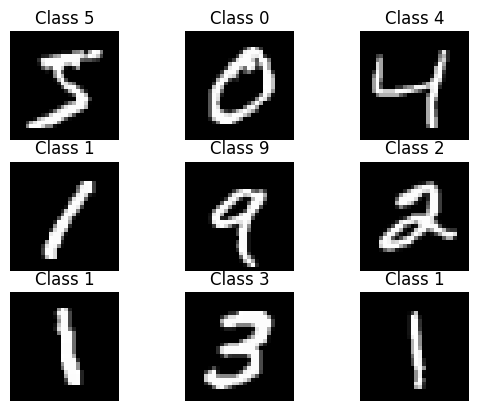

In [32]:
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title("Class {}".format(y_train[i]))


In [33]:
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [34]:
sgd = SGD(learning_rate=1.0, weight_decay=1e-3, momentum=0.5)
# network parameters
batch_size = 128

In [ ]:
# Beschreibung der Aufgabe erstellen der Schichten etc.

In [35]:
model_mnist = Sequential([ 
    # hinzufügen eines Dense-Schicht: 10000 Neuronen, Eingabe-Dimension von 784 und einer 'relu'
    tf.keras.layers.Dense(10000, input_dim=784, activation='relu'),
    # hinzufügen einer Ausgabeschicht als Dense-Layer für 10 Ausgabewerte mit 'softmax'
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
model_mnist.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])
model_mnist.fit(x_train, y_train, epochs=2, batch_size=batch_size)

Epoch 1/2
469/469 [==============================] - 28s 58ms/step - loss: 0.3429 - accuracy: 0.9173
Epoch 2/2
469/469 [==============================] - 27s 58ms/step - loss: 0.1022 - accuracy: 0.9688


In [37]:
loss, acc = model_mnist.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 11ms/step - loss: 0.1112 - accuracy: 0.9656

Test accuracy: 96.6%


## Schritt 5: Erstellen eines Convolutional Neural Nertworks (CNN oder ConvNet)

Hier wird eine spezielles Neuronales Netzwerk erstellt, im deutschen würde man das es etwa als 'faltendes neuronales Netzwerk' übersetzen. https://de.wikipedia.org/wiki/Convolutional_Neural_Network 

### Schritt 5.1: Architekturdefinition des CNN

Erläuterung der ersten Faltungsschicht:
- Conv2D: beschreibt den Namen der Funktion,
- 1. Argument: 16, definiert die Anzahl der Neuronen in diesem Layer
- 2. Argument: (3, 3), definiert die Größe des Filterkernels (Faltungsfunktion) die eine Fläche von 3 x 3 Pixeln auf ein Pixel herunterbricht
- 3. Argument: activation='relu', definiert die Aktivierungsfunktion der Neurone in dieser Schicht, der ausführliche Name dieser Funktion ist 'Rectified Linear Unit' https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
- 4. Argument: input_shape=(100, 100, 3), definiert die Größe des Eingabebildes 100 x 100 Bildpunkte und drei Wrete für die Farbtiefe
- MaxPooling2D: beschreibt eine Funktion, welche überflüssige Informationen abschneidet, aus dem neu entstandenen Bild.
- 1. Argument: 2 beschreibt die Anzahl der vertikalten Bildpunkte, die zusammengefasst werden.
- 2. Argument: 2 beschreibt die Anzahl der horizontalen Bildpunkte, die zusammengefasst werden.

Quellen:
- https://de.wikipedia.org/wiki/Convolutional_Neural_Network
- https://www.deeplearningbook.org/contents/convnets.html 

In [32]:
model = Sequential([
    
    # Erste Schicht: erste Filterschicht und Eingabeschicht
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    # Zweite Schicht 
        MaxPooling2D(2, 2),
    
    # Zweite Schicht: eine weitere Faltungsschicht mit einem anschließenden Pooling Layer
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Dritte Schicht: 
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Vierte Schicht: 
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Ausgabe Schicht: 
        Dense(3, activation='softmax') 
])

### Schritt 5.2: Trainieren des Modells.

Achtung den nachfolgenden Block ausführen, falls kein kompiliertes Modell vorliegt.

In [33]:
start_time = time.time() # stoppen der Startzeit

model.compile(optimizer='adam', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

history = model.fit(
      train_generator,  
      epochs=80,
      verbose=1)

print("--- %s seconds ---" % (time.time() - start_time)) # printen der Dauer

Epoch 1/80
2/2 [==============================] - 7s 949ms/step - loss: 1.8113 - accuracy: 0.1329
Epoch 2/80
2/2 [==============================] - 7s 5s/step - loss: 1.2726 - accuracy: 0.1333
Epoch 3/80
2/2 [==============================] - 7s 5s/step - loss: 1.1316 - accuracy: 0.3333
Epoch 4/80
2/2 [==============================] - 7s 5s/step - loss: 1.1433 - accuracy: 0.3333
Epoch 5/80
2/2 [==============================] - 7s 5s/step - loss: 1.1666 - accuracy: 0.3333
Epoch 6/80
2/2 [==============================] - 6s 935ms/step - loss: 1.1544 - accuracy: 0.3333
Epoch 7/80
2/2 [==============================] - 7s 5s/step - loss: 1.1653 - accuracy: 0.3333
Epoch 8/80
2/2 [==============================] - 7s 915ms/step - loss: 1.1557 - accuracy: 0.3333
Epoch 9/80
2/2 [==============================] - 7s 5s/step - loss: 1.1719 - accuracy: 0.3333
Epoch 10/80
2/2 [==============================] - 7s 5s/step - loss: 1.2010 - accuracy: 0.3333
Epoch 11/80
2/2 [=======================

### Schritt 5.3: Speichern des Modells nur nach Training!

Achtung model.save() nur einkommentieren und aufrufen, wenn das Modell trainiert wurde. Falls nicht einfach mit dem nächsten Schritt fortfahren.

In [45]:
#model.save('cnn_model.h5')

### Schritt 5.4: Laden des Modells

Achtung nur einkommentieren und laden eines trainierten Modells! Sonst ist keine sinnvolle Vorhersage möglich.

In [52]:
model = tf.keras.models.load_model('cnn_model_good.h5')

## Vorhersagen durchführen mit dem ConvNet

Die folgende Schritt ist nur auszuführen, falls es unter Schritt drei nicht geschehen ist.

### Schritt 5.5: Einbinden der Bibliotheken zur Bildverarbeitung

Achtung nur ausführen, falls dies noch nicht unter Schritt 3 erfolgt ist.

In [37]:
import skimage.io
from skimage import transform
from tensorflow.keras.preprocessing import image

# hund: https://www.dasgesundetier.de/magazin/gfx/article/hund_verdauung.jpg
# old panda: https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg 
url_ = 'https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg'

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img_ = skimage.transform.resize(img, (100,100))
    
    img__ = image.img_to_array(img_)
    img___ = np.expand_dims(img__, axis=0)

    return img___

### Schritt 5.6: Speichern des Bildarrays in einer Variable

Achtung nur wenn es unter Schritt 3 nicht erfolgt ist.

In [38]:
images = read_and_transform_img(url_)

### Schritt 5.7: Klassifizieren des Bildes mit den CNN

Achtung das Ergebnis wird in einer neuen Variable gespeichert. Es wird zudem die Vorhersagefunktion von ''model'' aufgerufen und nicht von ''model_primitive''.

In [53]:
preds_cnn = model.predict(images)

1/1 [==============================] - 0s 64ms/step


### Schritt 5.8: Anzeigen der Wahrscheinlichkeiten

Die Anzeige der Ergebnisse des CNN Model.

In [54]:
print(preds_cnn[0])

[0.11028233 0.2527387  0.6369789 ]


### Schritt 5.9: Darstellungen der Klassenwahrscheinlichkeiten

Analog wie oben ist hier das Tier und seine Wahscheinlichkeit abzulesen.

In [55]:
prediction = np.argmax(preds_cnn)
pct = np.max(preds_cnn)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

It's a panda!
0.6369789


## Aufgaben Schitt 5

1. Vergleiche das Ergebnis aus Schritt 4.9 mit dem Ergebnis von Schritt 3.8. Was stellst du fest?

2. Nimm ein weiteres Bild aus dem Web und lasse es von beiden KIs vorhersagen. Dokumentiere deine Ergebnisse.

3. Welches Modell ist deiner Meinung nach besser wenn es um die Klassifikation von Bildern geht?

4. Kann man den Ergebnissen uneingeschränkt trauen?

# Schritt 6: Kann ich dem Modell vertrauen?

Stichworte: erklärbare künstliche Intelligenz, eXplainable Artificial Intelligence, XAI

In diesem Abschnitt des Notebooks geht es darum, die Entscheidungen welche durch künstliche Intelligenzen getroffen werden nachvollziehbar zu machen. Als Beispiel könnte man an eine KI denken, welche in Aufnahmen von MRT Bildern nach bösartigen Tumoren sucht. Diese Entscheidung ist nicht trivial, weil es um die Gesundheit von Menschen geht. Auf der anderen Seite gibt es schon Anwendungen die Mediziner bei dieser Suche unterstützen.

Um nun zu verstehen wieso in einem Bild, etwas erkannt wurde kann man XAI Methoden nutzen um die Bildpunkte einfärben zu lassen aufgrund derer das Modell eine Entscheidung getroffen hat.

In [42]:
!pip install lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

                                              0.0/275.7 kB ? eta -:--:--
     ---------------                        112.6/275.7 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
                                              0.0/8.3 MB ? eta -:--:--
     ---                                      0.8/8.3 MB 26.1 MB/s eta 0:00:01
     ----------------                         3.4/8.3 MB 36.5 MB/s eta 0:00:01
     -------------------------------------    7.8/8.3 MB 55.4 MB/s eta 0:00:01
     ---------------------------------------- 8.3/8.3 MB 48.2 MB/s eta 0:00:00
                                              0.0/298.0 kB ? eta -:--:--
     -------------------------------------- 298.0/298

C:\Users\falko\Desktop\it-sommerfest\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [70]:
explanation = explainer.explain_instance(images[0].astype('double'), 
                                         model.predict,  
                                         top_labels=3, 
                                         hide_color=0, 
                                         num_samples=1000)

  0%|                                                                                                                                                                                    | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


  2%|███▍                                                                                                                                                                      | 20/1000 [00:00<00:05, 175.22it/s]

1/1 [==============================] - 0s 33ms/step


  4%|██████▊                                                                                                                                                                   | 40/1000 [00:00<00:05, 176.54it/s]

1/1 [==============================] - 0s 27ms/step


  6%|██████████▏                                                                                                                                                               | 60/1000 [00:00<00:05, 168.15it/s]

1/1 [==============================] - 0s 32ms/step


  8%|█████████████▌                                                                                                                                                            | 80/1000 [00:00<00:05, 172.64it/s]

1/1 [==============================] - 0s 18ms/step


 10%|████████████████▉                                                                                                                                                        | 100/1000 [00:00<00:05, 172.43it/s]

1/1 [==============================] - 0s 18ms/step


 12%|████████████████████▎                                                                                                                                                    | 120/1000 [00:00<00:05, 173.64it/s]

1/1 [==============================] - 0s 32ms/step


 14%|███████████████████████▋                                                                                                                                                 | 140/1000 [00:00<00:05, 169.09it/s]

1/1 [==============================] - 0s 32ms/step


 16%|███████████████████████████                                                                                                                                              | 160/1000 [00:00<00:04, 172.26it/s]

1/1 [==============================] - 0s 33ms/step


 18%|██████████████████████████████▍                                                                                                                                          | 180/1000 [00:01<00:04, 165.97it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█████████████████████████████████▊                                                                                                                                       | 200/1000 [00:01<00:04, 164.03it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████████████████████████▏                                                                                                                                   | 220/1000 [00:01<00:04, 164.62it/s]

1/1 [==============================] - 0s 23ms/step


 24%|████████████████████████████████████████▌                                                                                                                                | 240/1000 [00:01<00:04, 169.01it/s]

1/1 [==============================] - 0s 33ms/step


 26%|███████████████████████████████████████████▉                                                                                                                             | 260/1000 [00:01<00:04, 167.33it/s]

1/1 [==============================] - 0s 19ms/step


 28%|███████████████████████████████████████████████▎                                                                                                                         | 280/1000 [00:01<00:04, 166.07it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██████████████████████████████████████████████████▋                                                                                                                      | 300/1000 [00:01<00:04, 168.15it/s]

1/1 [==============================] - 0s 26ms/step


 32%|██████████████████████████████████████████████████████                                                                                                                   | 320/1000 [00:01<00:04, 168.63it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████████████████████████████████████▍                                                                                                               | 340/1000 [00:02<00:03, 170.84it/s]

1/1 [==============================] - 0s 31ms/step


 36%|████████████████████████████████████████████████████████████▊                                                                                                            | 360/1000 [00:02<00:03, 169.00it/s]

1/1 [==============================] - 0s 13ms/step


 38%|████████████████████████████████████████████████████████████████▏                                                                                                        | 380/1000 [00:02<00:03, 167.01it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████████████████████████████████████████████████████████▌                                                                                                     | 400/1000 [00:02<00:03, 171.10it/s]

1/1 [==============================] - 0s 13ms/step


 43%|████████████████████████████████████████████████████████████████████████▋                                                                                                | 430/1000 [00:02<00:03, 177.71it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████████████████████████████████████████████████████████████████████████████                                                                                             | 450/1000 [00:02<00:03, 180.92it/s]

1/1 [==============================] - 0s 16ms/step


 47%|███████████████████████████████████████████████████████████████████████████████▍                                                                                         | 470/1000 [00:02<00:02, 185.88it/s]

1/1 [==============================] - 0s 14ms/step


 50%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 495/1000 [00:02<00:02, 203.13it/s]

1/1 [==============================] - 0s 16ms/step


 52%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 520/1000 [00:02<00:02, 197.83it/s]

1/1 [==============================] - 0s 21ms/step


 54%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 541/1000 [00:03<00:02, 195.26it/s]

1/1 [==============================] - 0s 14ms/step


 57%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 570/1000 [00:03<00:02, 198.23it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 590/1000 [00:03<00:02, 191.60it/s]

1/1 [==============================] - 0s 20ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 620/1000 [00:03<00:01, 197.87it/s]

1/1 [==============================] - 0s 15ms/step


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 641/1000 [00:03<00:01, 195.65it/s]

1/1 [==============================] - 0s 30ms/step


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 670/1000 [00:03<00:01, 196.85it/s]

1/1 [==============================] - 0s 15ms/step


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 700/1000 [00:03<00:01, 202.80it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 721/1000 [00:03<00:01, 199.78it/s]

1/1 [==============================] - 0s 25ms/step


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 750/1000 [00:04<00:01, 197.13it/s]

1/1 [==============================] - 0s 17ms/step


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 770/1000 [00:04<00:01, 196.75it/s]

1/1 [==============================] - 0s 32ms/step


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 790/1000 [00:04<00:01, 192.48it/s]

1/1 [==============================] - 0s 16ms/step


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 819/1000 [00:04<00:00, 211.88it/s]

1/1 [==============================] - 0s 16ms/step


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 841/1000 [00:04<00:01, 134.68it/s]

1/1 [==============================] - 0s 22ms/step


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 860/1000 [00:04<00:00, 142.34it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 880/1000 [00:04<00:00, 150.92it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 910/1000 [00:05<00:00, 162.90it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 930/1000 [00:05<00:00, 168.47it/s]

1/1 [==============================] - 0s 22ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 959/1000 [00:05<00:00, 192.81it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 980/1000 [00:05<00:00, 178.15it/s]

1/1 [==============================] - 0s 16ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 178.34it/s]


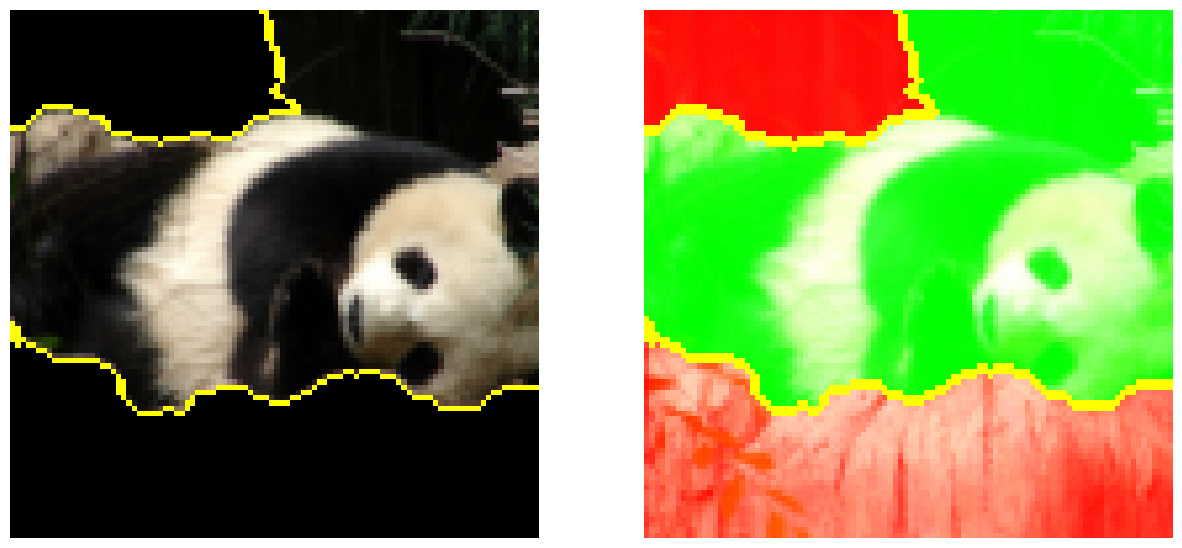

In [71]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

plt.savefig('mask_default.png')